# Data Analysis

##### Import libraries

In [119]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplot graph won't pop up
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##### Load Data Set

In [120]:
my_data = pd.read_csv('/Users/deborabastos/Documents/3.DataScience/accenture_data_analytics/data/my_data.csv')
my_data.head()

,Content ID,Reaction Type,Datetime,User ID (Post owner),Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0.0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30.0


##### Group by Category and sort by most popular categories

In [121]:
total_categories = my_data.groupby(by = 'Category', as_index= False)['Score'].sum()
total_categories_sort = total_categories.sort_values("Score", ascending=False)
total_categories_sort

,Category,Score
0,animals,74965.0
9,science,71168.0
7,healthy eating,69339.0
12,technology,68738.0
6,food,66676.0
2,culture,66579.0
14,travel,64880.0
1,cooking,64756.0
10,soccer,57783.0
4,education,57436.0


In [122]:
pop_categories = total_categories_sort[0:5]
pop_categories

,Category,Score
0,animals,74965.0
9,science,71168.0
7,healthy eating,69339.0
12,technology,68738.0
6,food,66676.0


<AxesSubplot:xlabel='Score', ylabel='Category'>

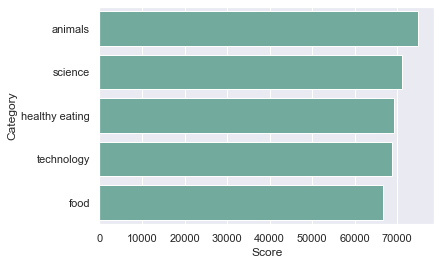

In [123]:
# Plot Category
plt.figure(figsize=(6,4))
sns.barplot(data = pop_categories, y = 'Category', x = 'Score',
            order = pop_categories.sort_values('Score', ascending = False).Category,
            color='#69b3a2')

# All categories:
# sns.barplot(data = total_categories_sort, y = 'Category', x = 'Score')

In [124]:
pt_content = pd.pivot_table(data=my_data, index="Category", columns="Content Type", aggfunc='sum')
pt_content

Score                           
Content Type         GIF    audio    photo    video
Category                                           
animals          12952.0  22748.0  27128.0  12137.0
cooking          20421.0  14826.0  17358.0  12151.0
culture          19616.0  15312.0  16722.0  14929.0
dogs              7942.0   9378.0  13626.0  21565.0
education         7744.0  13348.0  22132.0  14212.0
fitness          12923.0  12370.0  13029.0  17001.0
food             17750.0  15276.0  14643.0  19007.0
healthy eating   15308.0  20712.0  13476.0  19843.0
public speaking   5866.0  10041.0  12242.0  21115.0
science          14049.0  14966.0  20607.0  21546.0
soccer           20229.0   8773.0  12546.0  16235.0
studying         17392.0   7810.0  19931.0   9136.0
technology       19841.0  23160.0  16386.0   9351.0
tennis           16685.0  13372.0   8554.0  11728.0
travel           17216.0   8194.0  19479.0  19991.0
veganism         12283.0  15841.0  14979.0   6516.0

In [125]:
pt_content.describe()

Score                                        
Content Type           GIF         audio        photo        video
count            16.000000     16.000000     16.00000     16.00000
mean          14888.562500  14132.937500  16427.37500  15403.93750
std            4655.406992   4853.972538   4582.71602   4875.81388
min            5866.000000   7810.000000   8554.00000   6516.00000
25%           12763.000000   9875.250000  13364.25000  12034.75000
50%           15996.500000  14099.000000  15682.50000  15582.00000
75%           18216.500000  15444.250000  19592.00000  19880.00000
max           20421.000000  23160.000000  27128.00000  21565.00000

In [126]:
pt_sentiment = pd.pivot_table(data=my_data, index="Category", columns="Sentiment", aggfunc='sum')
pt_sentiment

Score                 
Sentiment       negative neutral positive
Category                                 
animals           5222.0  6515.0  63228.0
cooking           4694.0  5155.0  54907.0
culture           4569.0  5685.0  56325.0
dogs              3354.0  5080.0  44077.0
education         3670.0  5245.0  48521.0
fitness           3741.0  4650.0  46932.0
food              4425.0  5965.0  56286.0
healthy eating    4255.0  5800.0  59284.0
public speaking   3162.0  3815.0  42287.0
science           4562.0  6360.0  60246.0
soccer            3714.0  5260.0  48809.0
studying          3711.0  4795.0  45763.0
technology        4090.0  6020.0  58628.0
tennis            3743.0  4380.0  42216.0
travel            4470.0  5405.0  55005.0
veganism          3402.0  4675.0  41542.0

In [127]:
pt_sentiment.describe()

Score                           
Sentiment     negative      neutral      positive
count        16.000000    16.000000     16.000000
mean       4049.000000  5300.312500  51503.500000
std         573.600907   737.722777   7260.610039
min        3162.000000  3815.000000  41542.000000
25%        3700.750000  4765.000000  45341.500000
50%        3916.500000  5252.500000  51858.000000
75%        4493.000000  5841.250000  56900.750000
max        5222.000000  6515.000000  63228.000000

In [128]:
pt_reaction_type = pd.pivot_table(data=my_data, index="Category", columns="Reaction Type", aggfunc='sum')
pt_reaction_type

Score                                                     \
Reaction Type     adore cherish disgust dislike   hate   heart indifferent   
Category                                                                     
animals          8208.0  8750.0     0.0  1150.0  640.0  7200.0      2000.0   
cooking          7632.0  5880.0     0.0  1150.0  520.0  6720.0      1620.0   
culture          6840.0  7910.0     0.0  1120.0  470.0  5820.0      2220.0   
dogs             5832.0  5040.0     0.0   840.0  435.0  5820.0      1860.0   
education        5976.0  6090.0     0.0   910.0  480.0  5460.0      1780.0   
fitness          6912.0  5110.0     0.0   950.0  355.0  4980.0      1640.0   
food             6696.0  8330.0     0.0  1060.0  650.0  6420.0      1940.0   
healthy eating   8784.0  7350.0     0.0  1010.0  605.0  6840.0      2160.0   
public speaking  5472.0  4550.0     0.0   820.0  305.0  5280.0      1540.0   
science          8496.0  7210.0     0.0  1130.0  510.0  6900.0      2440.0   
soccer           6264.0  6020.0     0.0   810.0  435.0  5580.0      2320.0   
studying         6408.0  6440.0     0.0   740.0  430.0  6060.0      1540.0   
technology       9288.0  7980.0     0.0   950.0  560.0  6840.0      1960.0   
tennis           5256.0  5670.0     0.0   920.0  435.0  5400.0      1720.0   
travel           8280.0  6930.0     0.0  1220.0  475.0  6300.0      1940.0   
veganism         5112.0  5810.0     0.0   700.0  455.0  5700.0      1560.0   

                                                                      \
Reaction Type   interested intrigued    like    love peeking  scared   
Category                                                               
animals             3300.0    5220.0  5050.0  7735.0  4515.0  1980.0   
cooking             3750.0    3960.0  5700.0  6435.0  3535.0  1800.0   
culture             3300.0    4545.0  4850.0  7020.0  3465.0  1755.0   
dogs                2730.0    3150.0  4650.0  4745.0  3220.0  1335.0   
education           2640.0    4320.0  4500.0  6825.0  3465.0  1200.0   
fitness             2430.0    3690.0  5550.0  5720.0  3010.0  1440.0   
food                3240.0    4230.0  5000.0  7995.0  4025.0  1515.0   
healthy eating      3030.0    4815.0  5300.0  6695.0  3640.0  1500.0   
public speaking     2250.0    4140.0  3700.0  5525.0  2275.0  1125.0   
science             3540.0    4995.0  5650.0  7735.0  3920.0  1530.0   
soccer              2640.0    4185.0  4550.0  5655.0  2940.0  1485.0   
studying            2610.0    3780.0  4000.0  5395.0  3255.0  1425.0   
technology          3630.0    3915.0  4350.0  6240.0  4060.0  1320.0   
tennis              2610.0    3690.0  4000.0  5005.0  2660.0  1320.0   
travel              2700.0    4680.0  5550.0  6110.0  3465.0  1575.0   
veganism            2070.0    3060.0  3600.0  4875.0  3115.0  1275.0   

                                            
Reaction Type   super love    want worried  
Category                                    
animals             9225.0  8540.0  1452.0  
cooking             8250.0  6580.0  1224.0  
culture             7500.0  8540.0  1224.0  
dogs                6300.0  5810.0   744.0  
education           6900.0  5810.0  1080.0  
fitness             7500.0  5040.0   996.0  
food                6675.0  7700.0  1200.0  
healthy eating      8700.0  7770.0  1140.0  
public speaking     5700.0  5670.0   912.0  
science             6900.0  8820.0  1392.0  
soccer              7125.0  6790.0   984.0  
studying            6450.0  4620.0  1116.0  
technology          8475.0  7910.0  1260.0  
tennis              5475.0  5110.0  1068.0  
travel              6825.0  7630.0  1200.0  
veganism            5925.0  5390.0   972.0

In [129]:
pt_reaction_type.describe()

Score                                               \
Reaction Type        adore     cherish disgust      dislike        hate   
count            16.000000    16.00000    16.0    16.000000   16.000000   
mean           6966.000000  6566.87500     0.0   967.500000  485.000000   
std            1329.305383  1258.24067     0.0   159.728937   94.586821   
min            5112.000000  4550.00000     0.0   700.000000  305.000000   
25%            5940.000000  5775.00000     0.0   835.000000  435.000000   
50%            6768.000000  6265.00000     0.0   950.000000  472.500000   
75%            8226.000000  7490.00000     0.0  1122.500000  530.000000   
max            9288.000000  8750.00000     0.0  1220.000000  650.000000   

                                                                               \
Reaction Type        heart  indifferent   interested   intrigued         like   
count            16.000000    16.000000    16.000000    16.00000    16.000000   
mean           6082.500000  1890.000000  2904.375000  4148.43750  4750.000000   
std             677.362532   285.470372   504.763559   611.78351   696.658692   
min            4980.000000  1540.000000  2070.000000  3060.00000  3600.000000   
25%            5550.000000  1635.000000  2610.000000  3757.50000  4262.500000   
50%            5940.000000  1900.000000  2715.000000  4162.50000  4750.000000   
75%            6750.000000  2040.000000  3300.000000  4578.75000  5362.500000   
max            7200.000000  2440.000000  3750.000000  5220.00000  5700.000000   

                                                                   \
Reaction Type         love      peeking       scared   super love   
count            16.000000    16.000000    16.000000    16.000000   
mean           6231.875000  3410.312500  1473.750000  7120.312500   
std            1039.966145   562.033418   225.665682  1094.920802   
min            4745.000000  2275.000000  1125.000000  5475.000000   
25%            5492.500000  3088.750000  1320.000000  6412.500000   
50%            6175.000000  3465.000000  1462.500000  6900.000000   
75%            6873.750000  3710.000000  1541.250000  7687.500000   
max            7995.000000  4515.000000  1980.000000  9225.000000   

                                         
Reaction Type         want      worried  
count            16.000000    16.000000  
mean           6733.125000  1122.750000  
std            1407.497632   179.490947  
min            4620.000000   744.000000  
25%            5600.000000   993.000000  
50%            6685.000000  1128.000000  
75%            7805.000000  1224.000000  
max            8820.000000  1452.000000

In [130]:
my_data['Category'].value_counts()


animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

In [131]:
my_data['Sentiment'].value_counts()


positive    13807
negative     7695
neutral      3071
Name: Sentiment, dtype: int64

In [132]:
my_data['Content Type'].value_counts()


photo    6589
video    6245
GIF      6079
audio    5660
Name: Content Type, dtype: int64

In [133]:
my_data['Reaction Type'].value_counts()


heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Reaction Type, dtype: int64

In [134]:
# Group by content
total_content = my_data.groupby(["Content ID", "Category"]).sum("Score")

In [135]:
# Sort by most popular content
total_content.sort_values("Score", ascending=False)

,,Score
Content ID,Category,
292051b5-b835-4a60-962a-bddf10da82bd,technology,2273.0
697af362-e84b-4429-b4ea-4123c6ab44ba,science,2231.0
4dd4da35-453e-466d-95ca-b1a7710fac1f,technology,2223.0
cd568dd1-70cf-45d6-b495-10eebff8c920,dogs,2222.0
31d142d9-4557-4613-bce5-cfe63cd0a3cf,soccer,2164.0
...,...,...
7e9865ec-7455-4b39-89f7-92e2a82d0f12,education,10.0
88e43f42-027e-4256-bab4-2d1c2b6f8f67,education,5.0
48fd48c7-bc82-414e-8941-aa2090183aec,dogs,5.0


In [136]:
# Check if total score is the same for total_categories and total_contet 
total_categories['Score'].sum()

973645.0

In [137]:
total_content['Score'].sum()

973645.0

In [138]:
# Checking 
my_data.groupby(["Content ID", "Category", "Sentiment"])[["Sentiment"]].count()

Sentiment
Content ID                           Category       Sentiment           
004e820e-49c3-4ba2-9d02-62db0065410c tennis         positive           1
00d0cdf9-5919-4102-bf84-ebde253c3cd2 healthy eating negative          13
                                                    neutral            4
                                                    positive          29
01396602-c759-4a17-90f0-8f9b3ca11b30 tennis         negative          15
...                                                                  ...
fea9077f-2fe7-43bd-aaef-dc2619988d94 culture        neutral            3
                                                    positive           2
ff883828-a610-492d-8635-8a777eaad25f education      negative          16
                                                    neutral           10
                                                    positive          22

[2710 rows x 1 columns]